In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np

train_samples = 10000

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

def expand(i):
    res = [0 for _ in range(0, 10)]
    res[i] = 1 
    return res

y = [expand(int(v)) for v in y]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import src.FFNN as ffnn
from src.utils import plot_training_results
from src.Regularization import LNormRegularization

In [3]:
# Define neural network parameters
layer_size = [784, 128, 128, 10]
activations = ["sigmoid", "sigmoid", "tanh"]

## Training

In [4]:
model = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="uniform", weight_init_args={"seed": 73})
plot = model.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)

Epoch 1/300, Loss: 0.7746, Val_loss: 0.5160
Epoch 2/300, Loss: 0.4689, Val_loss: 0.4243
Epoch 3/300, Loss: 0.3922, Val_loss: 0.3682
Epoch 4/300, Loss: 0.3457, Val_loss: 0.3320
Epoch 5/300, Loss: 0.3088, Val_loss: 0.3036
Epoch 6/300, Loss: 0.2824, Val_loss: 0.2691
Epoch 7/300, Loss: 0.2615, Val_loss: 0.2613
Epoch 8/300, Loss: 0.2464, Val_loss: 0.2430
Epoch 9/300, Loss: 0.2345, Val_loss: 0.2332
Epoch 10/300, Loss: 0.2213, Val_loss: 0.2274
Epoch 11/300, Loss: 0.2135, Val_loss: 0.2190
Epoch 12/300, Loss: 0.2139, Val_loss: 0.2154
Epoch 13/300, Loss: 0.2096, Val_loss: 0.2026
Epoch 14/300, Loss: 0.1988, Val_loss: 0.2037
Epoch 15/300, Loss: 0.1936, Val_loss: 0.2004
Epoch 16/300, Loss: 0.1922, Val_loss: 0.1915
Epoch 17/300, Loss: 0.1841, Val_loss: 0.1844
Epoch 18/300, Loss: 0.1811, Val_loss: 0.1843
Epoch 19/300, Loss: 0.1782, Val_loss: 0.1821
Epoch 20/300, Loss: 0.1748, Val_loss: 0.1790
Epoch 21/300, Loss: 0.1725, Val_loss: 0.1756
Epoch 22/300, Loss: 0.1671, Val_loss: 0.1763
Epoch 23/300, Loss:

In [5]:
model_L1 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="uniform", weight_init_args={"seed": 73}, 
                  alpha_regularizer=0.1, 
                  regularizer=LNormRegularization(p = 1))
plot_L1 = model_L1.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)

Epoch 1/300, Loss: 1.0290, Val_loss: 0.9795
Epoch 2/300, Loss: 0.9913, Val_loss: 1.0166
Epoch 3/300, Loss: 0.9891, Val_loss: 0.9629
Epoch 4/300, Loss: 0.9902, Val_loss: 1.0091
Epoch 5/300, Loss: 0.9892, Val_loss: 0.9787
Epoch 6/300, Loss: 0.9872, Val_loss: 0.9873
Epoch 7/300, Loss: 0.9890, Val_loss: 0.9622
Epoch 8/300, Loss: 0.9887, Val_loss: 1.0003
Epoch 9/300, Loss: 0.9884, Val_loss: 0.9728
Epoch 10/300, Loss: 0.9873, Val_loss: 1.0151
Epoch 11/300, Loss: 0.9851, Val_loss: 0.9934
Epoch 12/300, Loss: 0.9869, Val_loss: 0.9507
Epoch 13/300, Loss: 0.9885, Val_loss: 1.0110
Epoch 14/300, Loss: 0.9851, Val_loss: 0.9967
Epoch 15/300, Loss: 0.9815, Val_loss: 0.9851
Epoch 16/300, Loss: 0.9815, Val_loss: 0.9940
Epoch 17/300, Loss: 0.9850, Val_loss: 0.9941
Epoch 18/300, Loss: 0.9870, Val_loss: 1.0095
Epoch 19/300, Loss: 0.9883, Val_loss: 0.9550
Epoch 20/300, Loss: 0.9883, Val_loss: 0.9879
Epoch 21/300, Loss: 0.9873, Val_loss: 1.0056
Epoch 22/300, Loss: 0.9862, Val_loss: 0.9560
Epoch 23/300, Loss:

In [6]:
model_L2 = ffnn.FFNN(layer_sizes=layer_size, activations=activations, loss="mse", weight_initializer="uniform", weight_init_args={"seed": 73},
                 alpha_regularizer=0.1, 
                 regularizer=LNormRegularization(p = 2))
plot_L2 = model_L2.fit(X_train, y_train, 300, 0.1, 50, True, X_val, y_val)

Epoch 1/300, Loss: 1.0062, Val_loss: 0.5408
Epoch 2/300, Loss: 0.4921, Val_loss: 0.4508
Epoch 3/300, Loss: 0.4256, Val_loss: 0.3990
Epoch 4/300, Loss: 0.3836, Val_loss: 0.3779
Epoch 5/300, Loss: 0.3684, Val_loss: 0.3642
Epoch 6/300, Loss: 0.3484, Val_loss: 0.3331
Epoch 7/300, Loss: 0.3322, Val_loss: 0.3409
Epoch 8/300, Loss: 0.3181, Val_loss: 0.3101
Epoch 9/300, Loss: 0.3120, Val_loss: 0.3183
Epoch 10/300, Loss: 0.3108, Val_loss: 0.3054
Epoch 11/300, Loss: 0.2942, Val_loss: 0.2867
Epoch 12/300, Loss: 0.2914, Val_loss: 0.2915
Epoch 13/300, Loss: 0.2883, Val_loss: 0.2971
Epoch 14/300, Loss: 0.2855, Val_loss: 0.2858
Epoch 15/300, Loss: 0.2824, Val_loss: 0.2850
Epoch 16/300, Loss: 0.2822, Val_loss: 0.2802
Epoch 17/300, Loss: 0.2806, Val_loss: 0.2802
Epoch 18/300, Loss: 0.2699, Val_loss: 0.2746
Epoch 19/300, Loss: 0.2676, Val_loss: 0.2813
Epoch 20/300, Loss: 0.2668, Val_loss: 0.2692
Epoch 21/300, Loss: 0.2699, Val_loss: 0.2633
Epoch 22/300, Loss: 0.2590, Val_loss: 0.2674
Epoch 23/300, Loss:

In [7]:
y_test_labels = np.argmax(y_test, axis=1)

## Classification Report

In [8]:
y_pred = model.predict(X_test)

# Convert one-hot predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.9539
F1-score: 0.9538

Confusion Matrix:
[[672   0   3   0   3   2   1   1   2   1]
 [  0 805   6   2   0   0   1   1   4   1]
 [  2   3 676   4   5   2   7   5  11   1]
 [  0   2   8 671   0  10   2   6  11   5]
 [  2   1   0   0 627   1   6   2   2  18]
 [  4   2   1  21   4 585   3   1   9   4]
 [  3   2   1   3   2   9 668   0   1   0]
 [  1   4   9   0   2   2   0 686   0   6]
 [  2   2   6  10   3   7   5   3 603   2]
 [  4   3   2   7  14   1   1  11   2 684]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       685
           1       0.98      0.98      0.98       820
           2       0.95      0.94      0.95       716
           3       0.93      0.94      0.94       715
           4       0.95      0.95      0.95       659
           5       0.95      0.92      0.93       634
           6       0.96      0.97      0.97       689
           7       0.96      0.97      0.96       710
     

In [9]:
y_pred = model_L1.predict(X_test)

# Convert one-hot predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.1014
F1-score: 0.0187

Confusion Matrix:
[[  0   0   0   0   0   0   0 685   0   0]
 [  0   0   0   0   0   0   0 820   0   0]
 [  0   0   0   0   0   0   0 716   0   0]
 [  0   0   0   0   0   0   0 715   0   0]
 [  0   0   0   0   0   0   0 659   0   0]
 [  0   0   0   0   0   0   0 634   0   0]
 [  0   0   0   0   0   0   0 689   0   0]
 [  0   0   0   0   0   0   0 710   0   0]
 [  0   0   0   0   0   0   0 643   0   0]
 [  0   0   0   0   0   0   0 729   0   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       685
           1       0.00      0.00      0.00       820
           2       0.00      0.00      0.00       716
           3       0.00      0.00      0.00       715
           4       0.00      0.00      0.00       659
           5       0.00      0.00      0.00       634
           6       0.00      0.00      0.00       689
           7       0.10      1.00      0.18       710
     

/home/afif/tmp/ML_TUBES_1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/afif/tmp/ML_TUBES_1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/afif/tmp/ML_TUBES_1/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
y_pred = model_L2.predict(X_test)

# Convert one-hot predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
f1 = f1_score(y_test_labels, y_pred_labels, average="weighted")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))

Accuracy: 0.8486
F1-score: 0.8500

Confusion Matrix:
[[622   0   1  15   1  12  16   1  15   2]
 [  1 779   8   9   1   4   1   4  13   0]
 [  6   1 578  48  15  12  16   2  36   2]
 [  2   0  25 615   1  28   0   8  32   4]
 [  2   2   1  23 551   6   8   2  14  50]
 [  8   2   1  50  24 503   9   3  31   3]
 [  6   7   4  22   9  24 592   0  24   1]
 [  6   5  24  16   6  18   8 601  11  15]
 [  0   9  20  37   3  26   3   6 530   9]
 [  4   5   0  27  48   8   3  41  24 569]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       685
           1       0.96      0.95      0.96       820
           2       0.87      0.81      0.84       716
           3       0.71      0.86      0.78       715
           4       0.84      0.84      0.84       659
           5       0.78      0.79      0.79       634
           6       0.90      0.86      0.88       689
           7       0.90      0.85      0.87       710
     

## Loss training plot

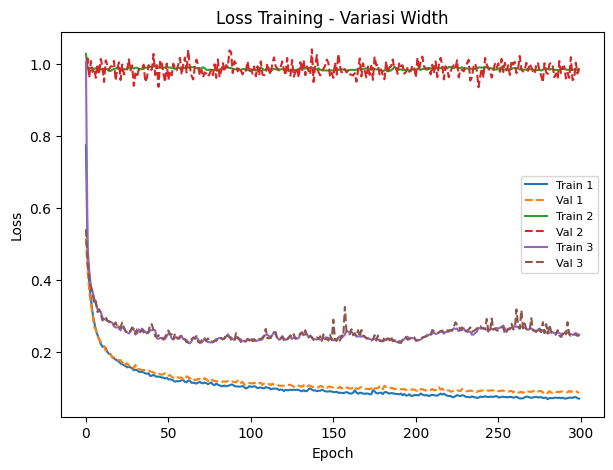

In [11]:
plot_training_results([plot, plot_L1, plot_L2])

## Weight and Weight Gradient Plot

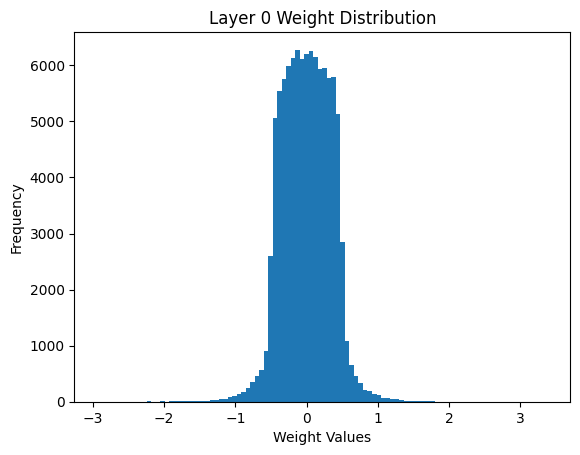

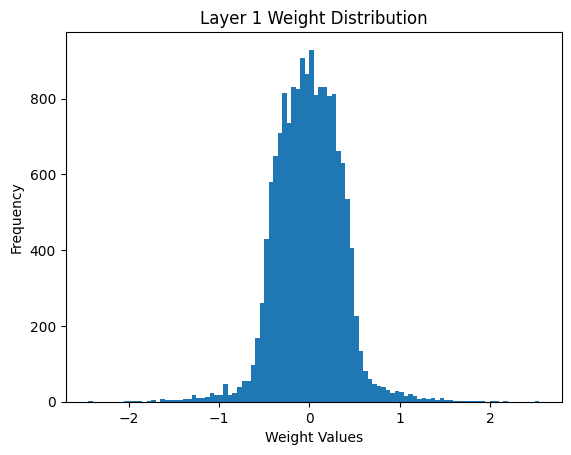

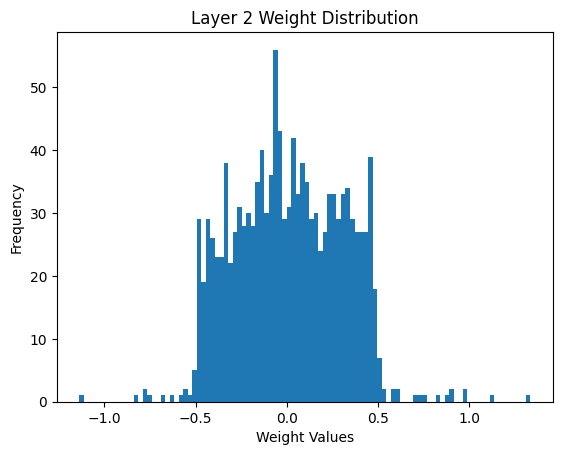

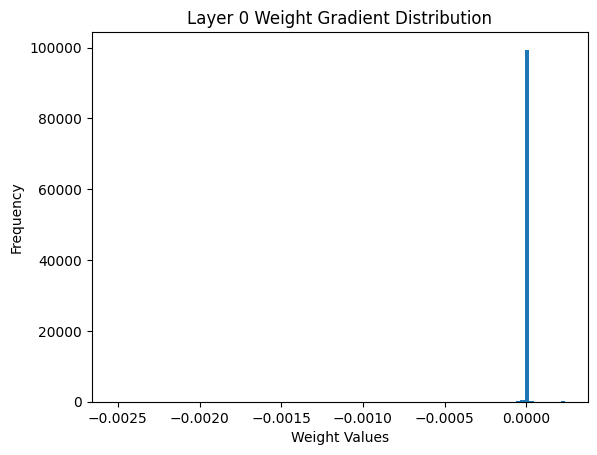

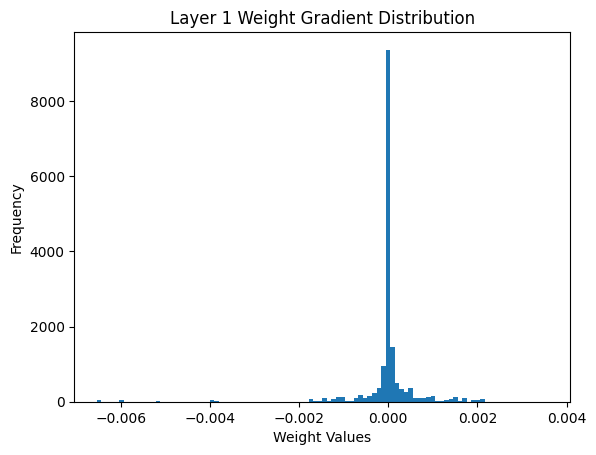

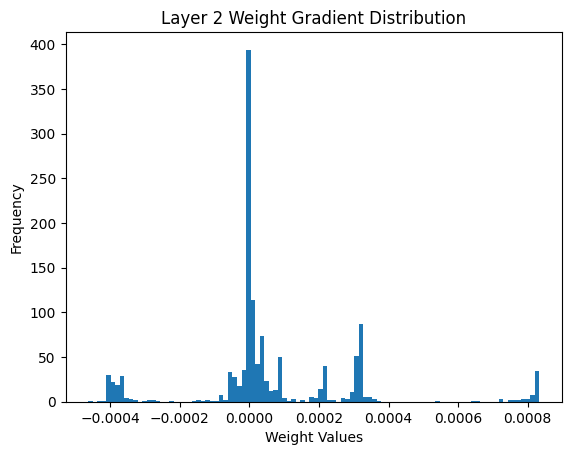

In [12]:
model.plot_weight([0,1,2])
model.plot_gradient_weight([0,1,2])

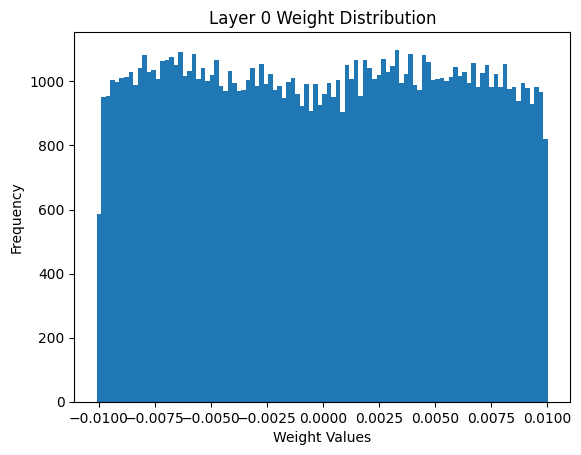

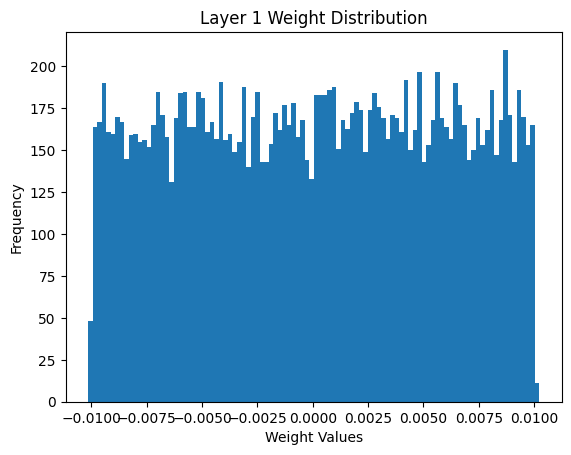

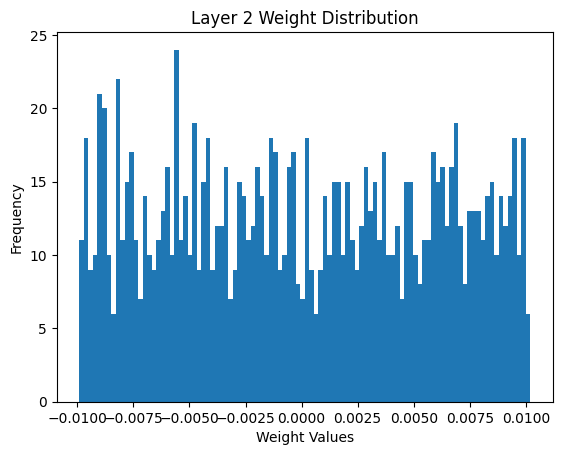

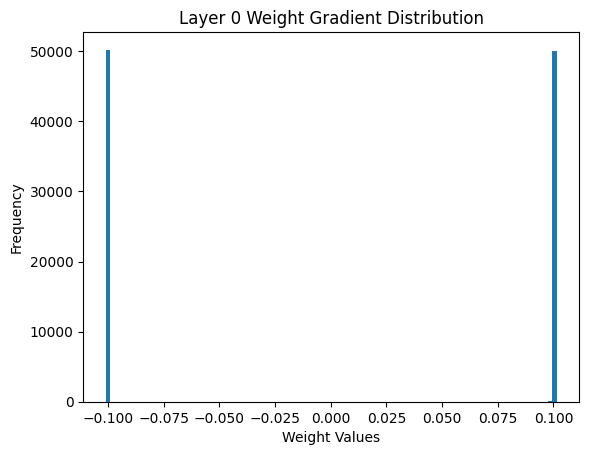

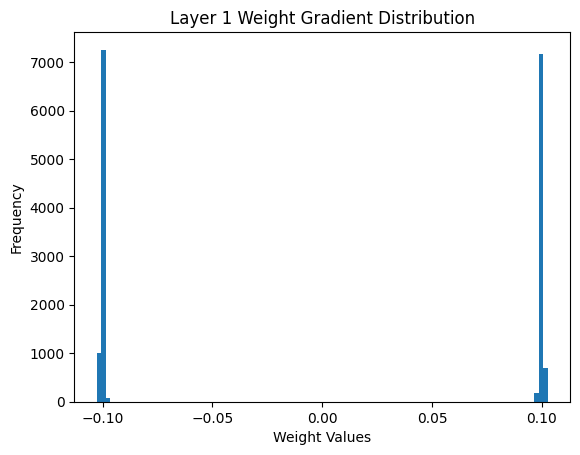

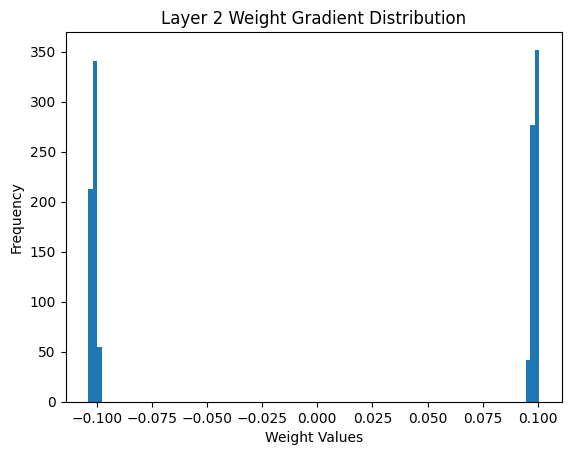

In [13]:
model_L1.plot_weight([0,1,2])
model_L1.plot_gradient_weight([0,1,2])

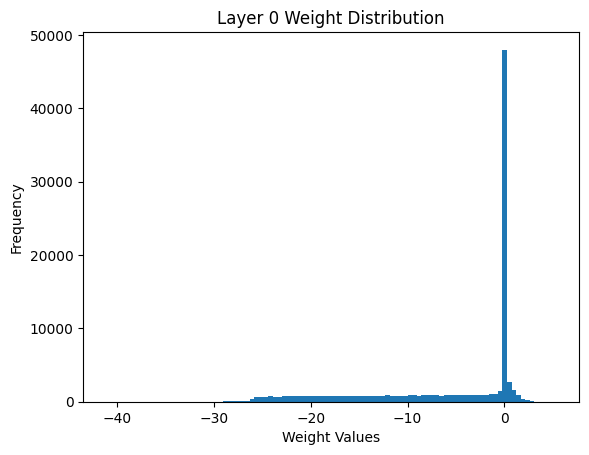

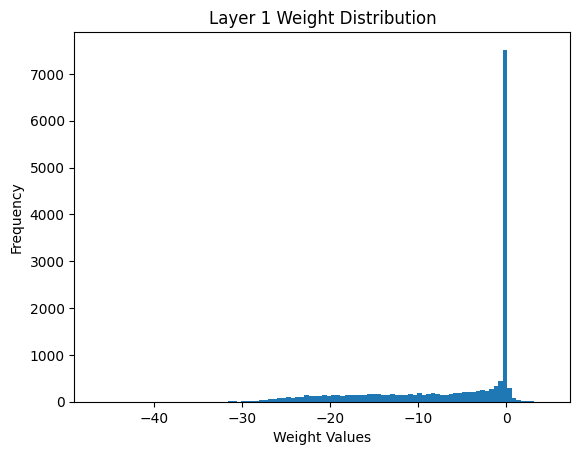

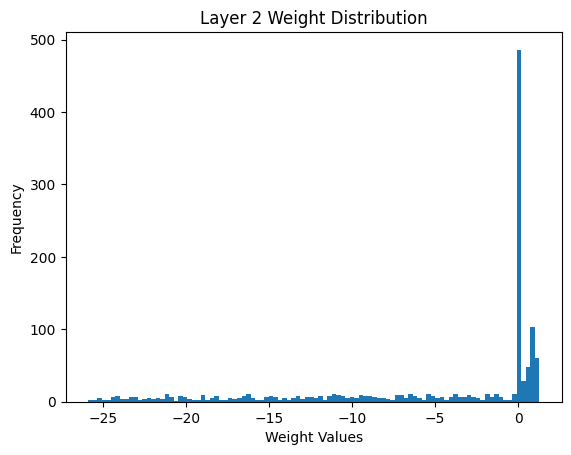

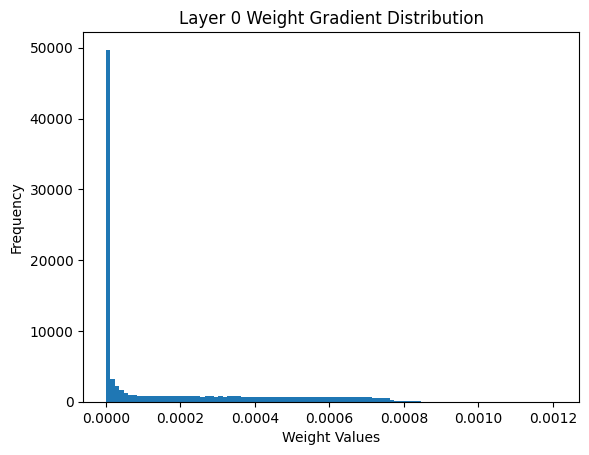

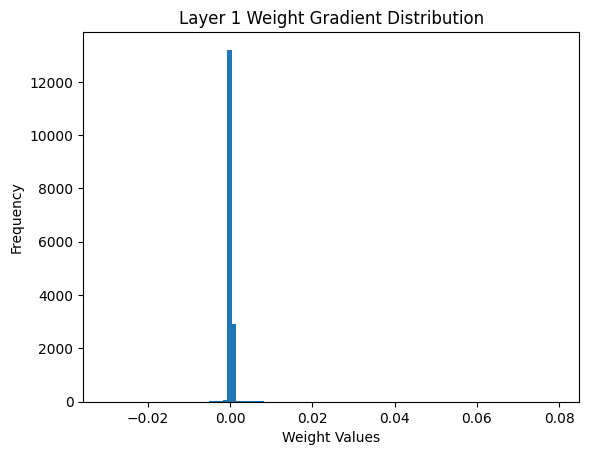

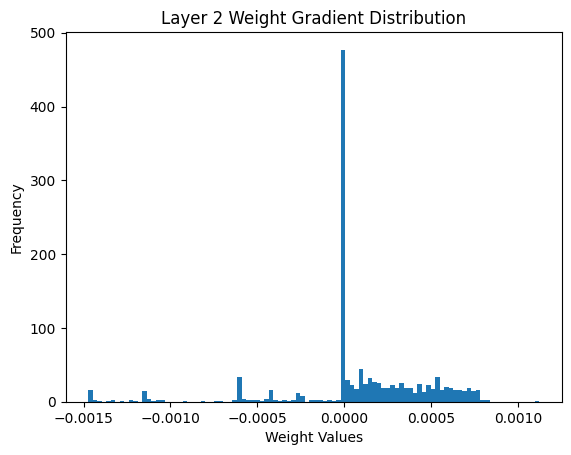

In [14]:
model_L2.plot_weight([0,1,2])
model_L2.plot_gradient_weight([0,1,2])